### Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\dell\Desktop\Python\week5\train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

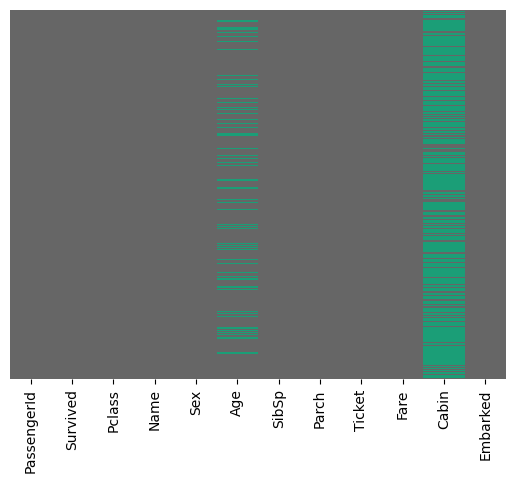

In [6]:
import seaborn as sns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

<Axes: >

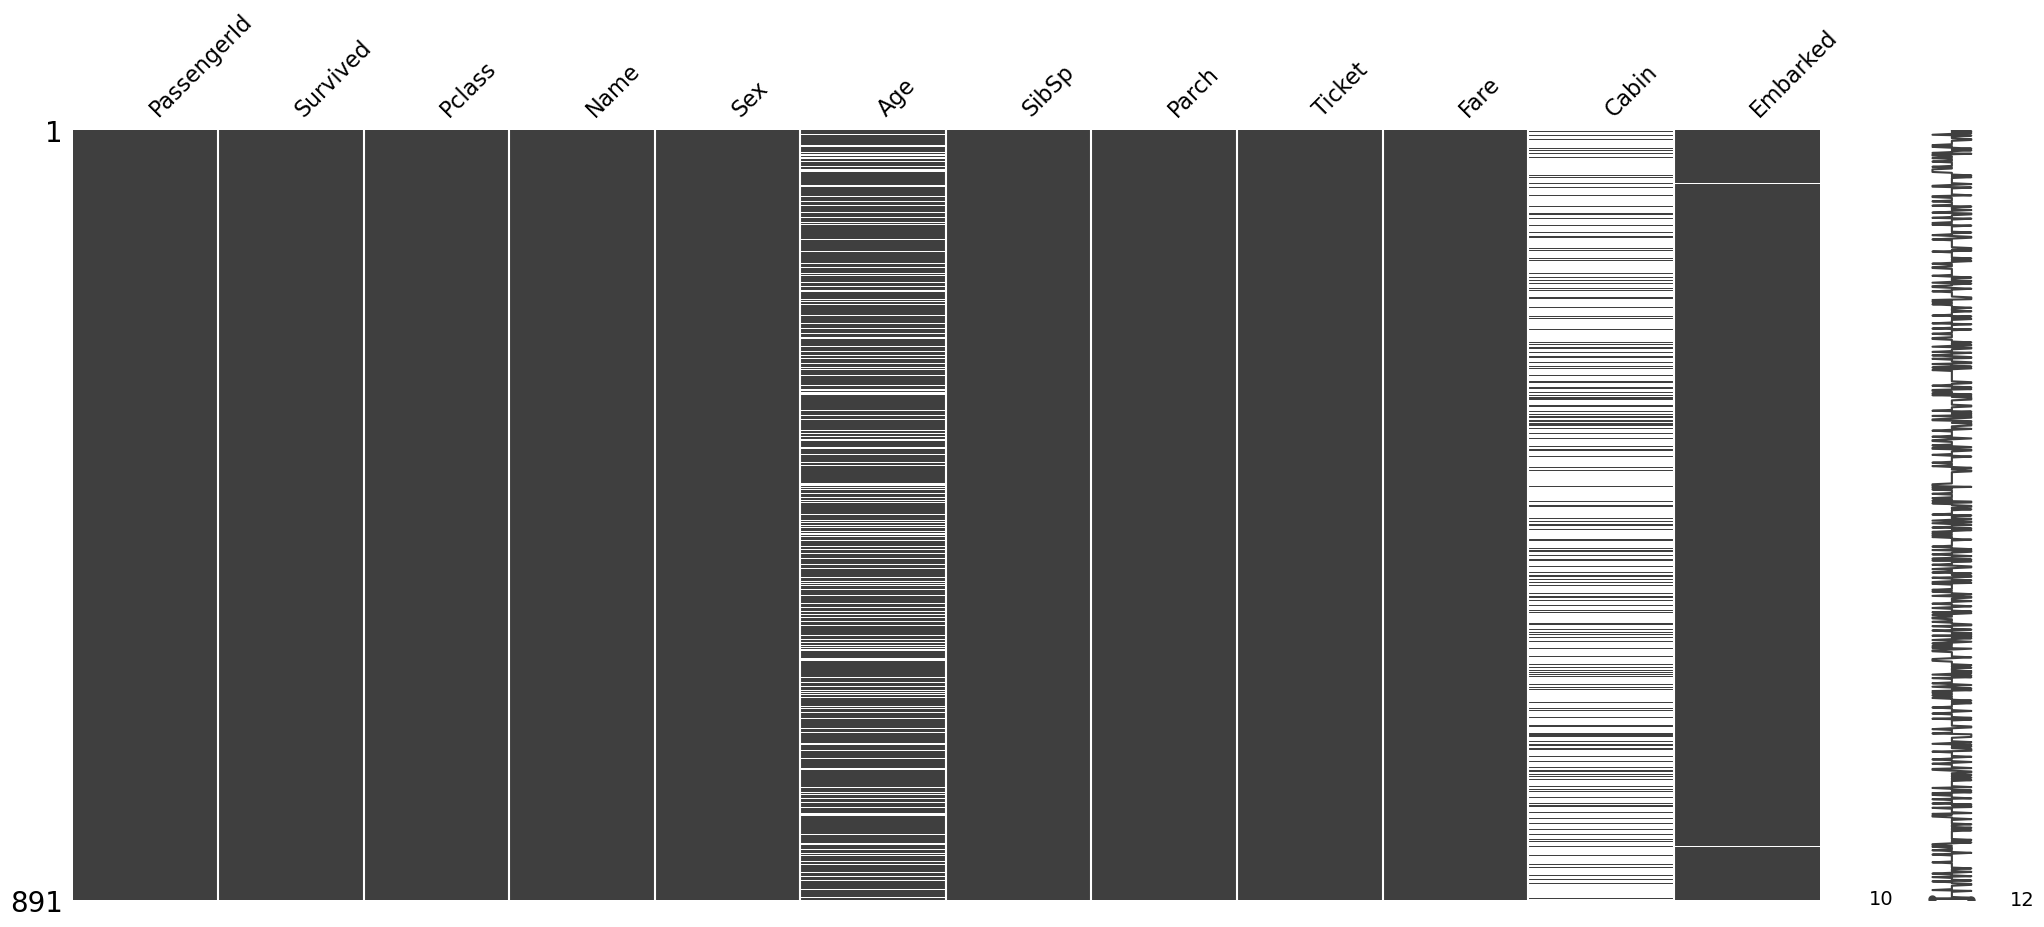

In [7]:
import missingno as msno
msno.matrix(train)

In [8]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.isnull().sum(axis=0)[train.isnull().sum(axis=0)>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
train[train.columns[train.isnull().sum(axis=0)>0]]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [11]:
train[train.columns[train.isnull().any(axis=0)]]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [12]:
train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

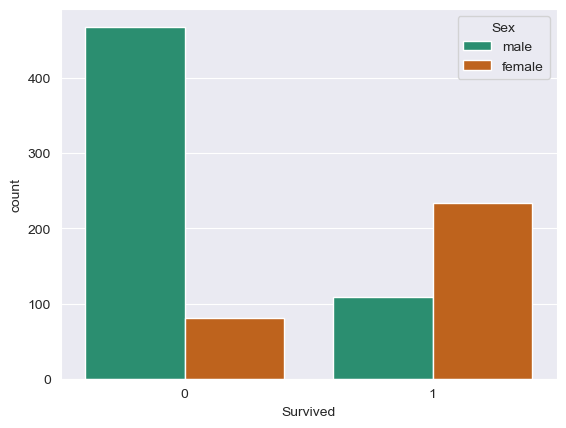

In [13]:
#count-plot of people survided
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='Dark2')

Text(0.5, 1.0, 'Gender distribution')

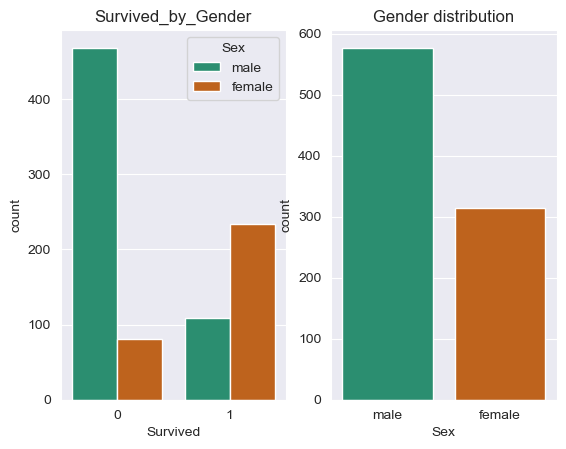

In [14]:
fig, ax = plt.subplots(1, 2)
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train,ax=ax[0],palette='Dark2').set_title('Survived_by_Gender')
sns.countplot( x='Sex', ax=ax[1], hue="Sex", data=train, palette='Dark2').set_title('Gender distribution')

C:\Users\dell\AppData\Local\Temp\ipykernel_7460\3476244446.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))


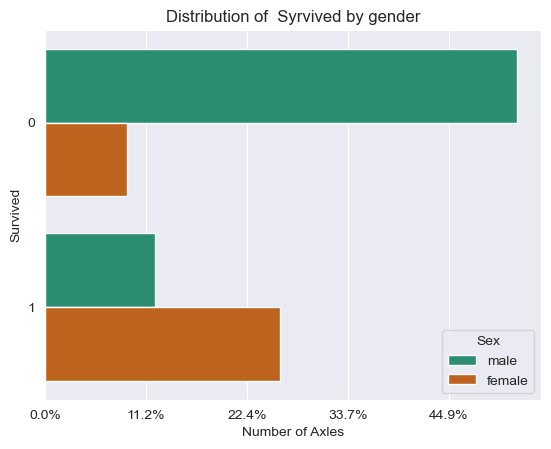

In [15]:
total = len(train['Survived'])*1.
ax = sns.countplot(y=train['Survived'], hue=train['Sex'],palette='Dark2')
plt.title('Distribution of  Syrvived by gender')
plt.xlabel('Number of Axles')

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
_ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))

Text(0.5, 1.0, 'Survived_by_Pclass')

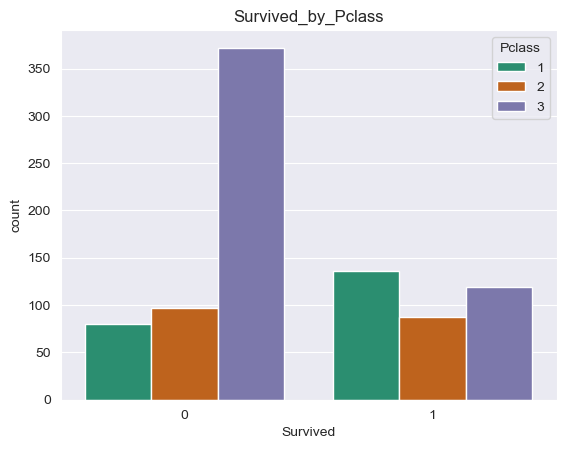

In [16]:
#no. of people who survived according to their Passenger Class
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=train,palette='Dark2').set_title('Survived_by_Pclass')

Text(0.5, 1.0, 'distribition_of_age')

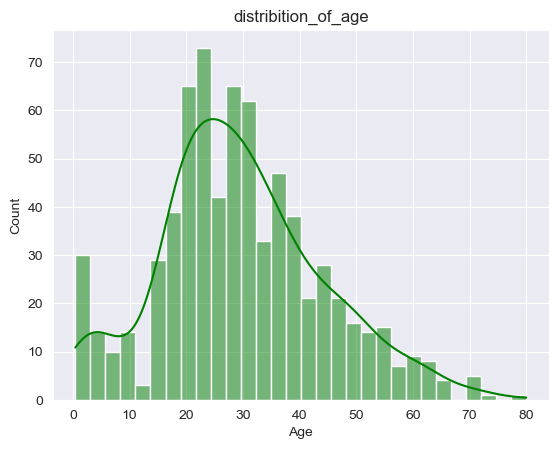

In [17]:
#distribution plot of age of the people
sns.histplot(train['Age'].dropna(), kde=True, bins=30, color='Green').set_title('distribition_of_age')

Text(0.5, 1.0, 'How many siblings do passengers on board have?')

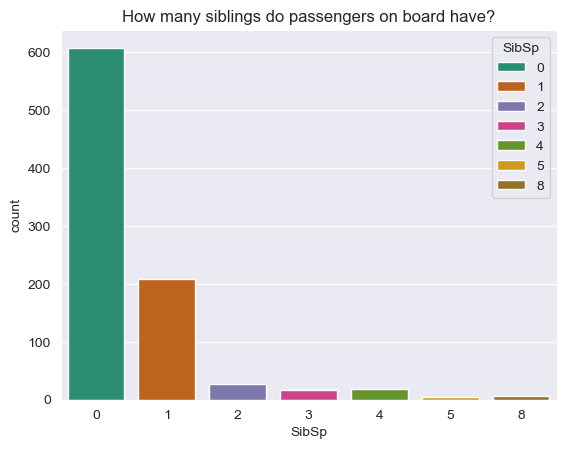

In [18]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train, hue="SibSp", 
              palette='Dark2').set_title('How many siblings do passengers on board have?')

Text(0.5, 1.0, 'Distribition_of_Fare')

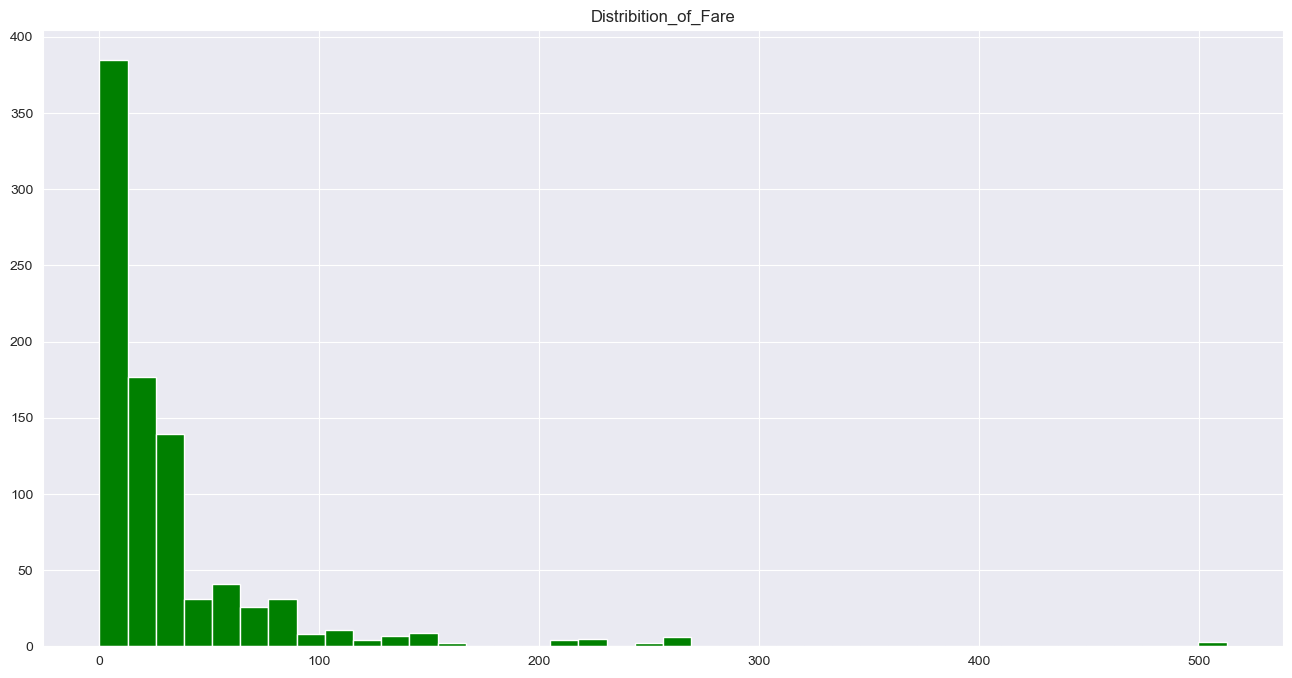

In [19]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(16,8)).set_title('Distribition_of_Fare')

Text(0.5, 1.0, 'Age_distribition_acording_to_pclass')

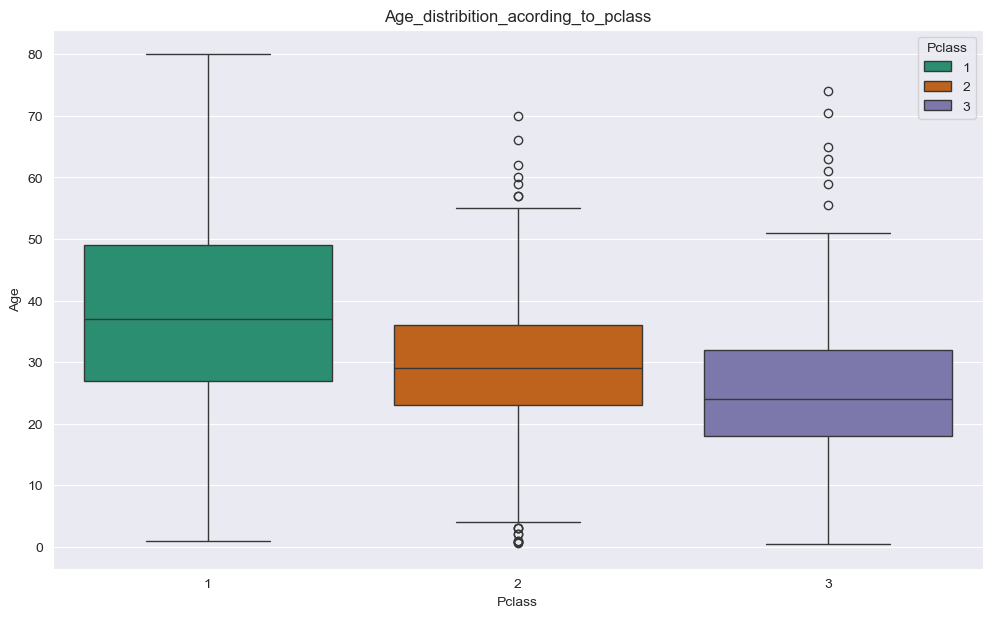

In [20]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.boxplot(x='Pclass',y='Age', hue="Pclass", 
            data=train,palette='Dark2').set_title('Age_distribition_acording_to_pclass')

### Data Preperation

In [21]:
train = pd.read_csv(r'C:\Users\dell\Desktop\Python\week5\train.csv')
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [22]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

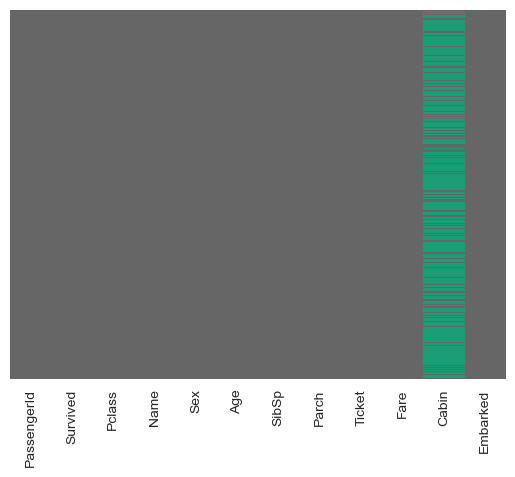

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [26]:
train.drop('Cabin',axis=1,inplace=True)

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [28]:
train.dropna(inplace=True)

In [29]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [30]:
sex = pd.get_dummies(train['Sex'],drop_first=True, dtype='int')
embark = pd.get_dummies(train['Embarked'],drop_first=True, dtype='int')#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)#check the head of dataframe
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


### Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
           train['Survived'], test_size=0.30,
            random_state=101)

## Modelling
### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [33]:
#predictions
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [34]:
#predict_probs
predict_probs = logmodel.predict_proba(X_test)[:, 1]
predict_probs

array([0.1120238 , 0.14997553, 0.76935075, 0.91620665, 0.15361797,
       0.03112009, 0.1253188 , 0.23010899, 0.07482882, 0.61351976,
       0.78929737, 0.95205695, 0.11411117, 0.57629931, 0.1175427 ,
       0.13184785, 0.91426917, 0.82270461, 0.53176   , 0.09766618,
       0.10711934, 0.09146623, 0.41255966, 0.31460655, 0.05796549,
       0.47633856, 0.62239251, 0.5230444 , 0.11644248, 0.31463282,
       0.0990766 , 0.24724778, 0.01587153, 0.10192202, 0.1119745 ,
       0.1250772 , 0.70235455, 0.05756724, 0.12639588, 0.1193244 ,
       0.53927606, 0.15450003, 0.12342976, 0.93337902, 0.6215737 ,
       0.1106913 , 0.62548961, 0.88900702, 0.09925022, 0.29064974,
       0.50468802, 0.79804963, 0.16220529, 0.13621737, 0.11330872,
       0.06215816, 0.44720774, 0.08193497, 0.10725099, 0.90822129,
       0.61162262, 0.94461926, 0.89544133, 0.09401299, 0.1849672 ,
       0.04067687, 0.11755489, 0.44158842, 0.04720895, 0.1191436 ,
       0.35455743, 0.13319385, 0.61607508, 0.8888567 , 0.08040

### New Feature and New Predict

In [35]:
X_new = pd.DataFrame({'PassengerId':[4], "Pclass": [1], "Age": [35], "SibSp": [1], "Parch": [0],
                               "Fare": [53.1], "male": [0], "Q": [0], "S": [1]})
predict_new = logmodel.predict(X_new)
predict_new

array([1], dtype=int64)

In [36]:
np.set_printoptions(precision=4, suppress=True) 
predict_prob_new_0_1 = logmodel.predict_proba(X_new)
predict_prob_new_0_1

array([[0.1249, 0.8751]])

In [37]:
predict_prob_new_1 = predict_prob_new_0_1[:, 1]
predict_prob_new_1

array([0.8751])

## Evaluation 

#### https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
#### Accurence = (TP + TN ) / (TP + FP + TN + FN)
#### PRECISON = TP / TP + FP
#### RECALL = TP / TP + FN
### F1 = 2 * ( (precision *  recall) / (precision+  recall) )
### F0.5 = 1.25 * ( (precision * recall) / (0.25 * precision + recall) )
### F2 = 5 * ( (precision * recall) / (4 * precision + recall) )

In [38]:
#                                     Predicted
#                     *******************************************     
#                     *  Positive        *     Negative         *
#         ***************************************************************************************
#         * Positive  *   True Positive  *    False Negative    *    Sensitivity                *
#         *           *     (TP)         *  (FN)Type II error   *  TP / (TP + FN)               *  
# Actual  ***************************************************************************************   
#         * Negative  *  False Positive  *   True Negative      *    Specificity                *  
#         *           * (FP)Type I error *      (TN)            *  TN / (TN + FP)               * 
#         *************************************************************************************** 
#         *           *  Precision       *  Negative Predictive *    Accuracy                   *   
#         *           * TP / (TP + FP)   *    TN / (TN + FN)    * TP + TN / (TP + TN + FP + FN) *
#         *************************************************************************************** 

### F1 score, modelin həm dəqiqlik, həm də recall göstəricilərində yaxşı performans göstərib-göstərmədiyini dəyərləndirir və balanslı bir metrikdir. Bir modelin F1 score-u yüksəkdirsə, demək olar ki, model həm yanlış müsbət, həm də yanlış mənfi nəticələri minimallaşdırmağa nail olur.

### Evaluation of Logistic Regression

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8277153558052435

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 32  72]]


In [42]:
#confusion matrix 
         #Peredicted
#           1      0
#        1 TP  |  FN
# Actual   
#        0 FP  |  TN  
#        

#### 149 (True Positives, TP): Model 149 nümunəni düzgün olaraq müsbət kimi təsnif edib. Yəni, həqiqətən müsbət olan 149 nümunə düzgün olaraq müsbət təsnif edilib.
#### 14 (False Negatives, FN): 14 nümunə həqiqətən müsbət olduğu halda model tərəfindən səhvən mənfi olaraq təsnif edilib.
#### 32 (False Positives, FP): 32 nümunə həqiqətən mənfi olduğu halda model tərəfindən səhvən müsbət kimi təsnif edilib.
#### 72 (True Negatives, TN): 72 nümunə düzgün olaraq mənfi kimi təsnif edilib. Yəni, həqiqətən mənfi olan 72 nümunə düzgün olaraq mənfi təsnif edilib.

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve #https://scikit-learn.org/stable/modules/model_evaluation.html -> for acc metrics
roc_auc_score(y_test,predictions)

0.8032090608777726

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

In [45]:
fpr

array([0.    , 0.    , 0.    , 0.0061, 0.0061, 0.0123, 0.0123, 0.0184,
       0.0184, 0.0245, 0.0245, 0.0368, 0.0368, 0.0429, 0.0429, 0.0491,
       0.0491, 0.0552, 0.0552, 0.0675, 0.0675, 0.0798, 0.0798, 0.0859,
       0.0859, 0.092 , 0.092 , 0.0982, 0.0982, 0.1043, 0.1043, 0.1534,
       0.1534, 0.1718, 0.1718, 0.1779, 0.1779, 0.1963, 0.1963, 0.2025,
       0.2025, 0.2209, 0.2209, 0.227 , 0.227 , 0.3313, 0.3313, 0.3436,
       0.3436, 0.362 , 0.362 , 0.3681, 0.3681, 0.3804, 0.3804, 0.411 ,
       0.411 , 0.4294, 0.4294, 0.5337, 0.5337, 0.5583, 0.5583, 0.5644,
       0.5644, 0.5706, 0.5706, 0.7239, 0.7239, 0.7362, 0.7362, 0.7423,
       0.7423, 0.8405, 0.8405, 0.8957, 0.8957, 0.9632, 0.9632, 1.    ])

In [46]:
tpr

array([0.    , 0.0096, 0.3654, 0.3654, 0.4423, 0.4423, 0.5   , 0.5   ,
       0.5288, 0.5288, 0.5385, 0.5385, 0.5481, 0.5481, 0.5769, 0.5769,
       0.6442, 0.6442, 0.6538, 0.6538, 0.6635, 0.6635, 0.6731, 0.6731,
       0.6923, 0.6923, 0.7115, 0.7115, 0.7212, 0.7212, 0.7308, 0.7308,
       0.7404, 0.7404, 0.75  , 0.75  , 0.7885, 0.7885, 0.7981, 0.7981,
       0.8077, 0.8077, 0.8173, 0.8173, 0.8269, 0.8269, 0.8365, 0.8365,
       0.8462, 0.8462, 0.8558, 0.8558, 0.8654, 0.8654, 0.875 , 0.875 ,
       0.8846, 0.8846, 0.8942, 0.8942, 0.9038, 0.9038, 0.9135, 0.9135,
       0.9231, 0.9231, 0.9327, 0.9327, 0.9423, 0.9423, 0.9615, 0.9615,
       0.9712, 0.9712, 0.9808, 0.9808, 0.9904, 0.9904, 1.    , 1.    ])

In [47]:
thresholds

array([   inf, 0.9571, 0.7694, 0.7672, 0.7287, 0.7157, 0.6819, 0.6747,
       0.6596, 0.6371, 0.6255, 0.6216, 0.6161, 0.6143, 0.6104, 0.6092,
       0.5553, 0.5513, 0.5446, 0.5409, 0.5401, 0.5371, 0.5318, 0.523 ,
       0.5047, 0.4993, 0.4763, 0.4535, 0.4492, 0.4472, 0.4416, 0.4022,
       0.4021, 0.3952, 0.3714, 0.3666, 0.3365, 0.3264, 0.3259, 0.3243,
       0.3225, 0.3146, 0.3143, 0.2954, 0.2952, 0.2298, 0.2279, 0.2226,
       0.2179, 0.1917, 0.185 , 0.1784, 0.1762, 0.1686, 0.1679, 0.1545,
       0.154 , 0.1533, 0.1509, 0.1334, 0.1332, 0.1253, 0.1251, 0.1241,
       0.1236, 0.1234, 0.1232, 0.1076, 0.1073, 0.1071, 0.1063, 0.1062,
       0.1044, 0.0825, 0.0819, 0.0628, 0.0622, 0.0525, 0.0512, 0.0159])

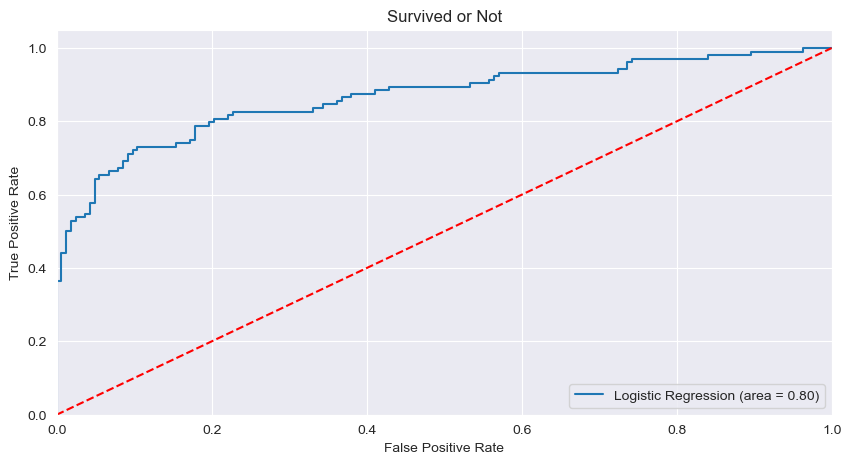

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [51]:
predicted = NBmodel.predict(X_test)
predicted

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [52]:
predicted_prob = NBmodel.predict_proba(X_test)[:, 1]
predicted_prob

array([0.0405, 0.1448, 0.905 , 0.9998, 0.1413, 0.0284, 0.0716, 0.0784,
       0.037 , 0.8225, 0.7296, 0.9956, 0.0404, 0.7842, 0.0381, 0.0419,
       0.9995, 0.9893, 0.5239, 0.038 , 0.0362, 0.0379, 0.297 , 0.2834,
       0.    , 0.3391, 0.7835, 0.851 , 0.0015, 0.0816, 0.0444, 0.4923,
       0.    , 0.0343, 0.0406, 0.1166, 0.9684, 0.0348, 0.0002, 0.0678,
       0.5526, 0.0426, 0.041 , 0.9316, 0.5666, 0.067 , 0.829 , 0.8289,
       0.065 , 0.0793, 0.247 , 0.7592, 0.0662, 0.0393, 0.0407, 0.0315,
       0.4376, 0.0374, 0.0001, 0.9999, 0.8186, 0.9864, 0.9382, 0.037 ,
       0.061 , 0.033 , 0.0397, 0.2363, 0.0304, 0.1321, 0.9587, 0.0846,
       0.5728, 0.9867, 0.1285, 0.8434, 0.0344, 0.0961, 0.0602, 0.2584,
       0.4967, 0.5601, 0.3198, 0.0362, 0.546 , 0.7023, 0.0503, 0.9999,
       0.0883, 0.9936, 0.5601, 0.5858, 0.0371, 0.079 , 0.0433, 0.9846,
       0.6333, 0.351 , 0.0846, 0.7799, 0.0738, 0.8889, 0.1411, 0.054 ,
       0.8069, 0.0353, 0.9879, 0.0453, 0.2099, 0.2233, 0.0099, 0.7688,
      

### Evaluatin of Naive Bayes

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [54]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)
prec_score = precision_score(y_test,predicted)
rec_score = recall_score(y_test, predicted)

In [55]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[144  19]
 [ 33  71]]


In [56]:
print('Accuracy Score for Naive Bayes:',score2 )
print('precision Score for Naive Bayes:', prec_score)
print('recall Score for Naive Bayes:', rec_score)

Accuracy Score for Naive Bayes: 0.8052434456928839
precision Score for Naive Bayes: 0.7888888888888889
recall Score for Naive Bayes: 0.6826923076923077


In [57]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



In [58]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.7830639452571968


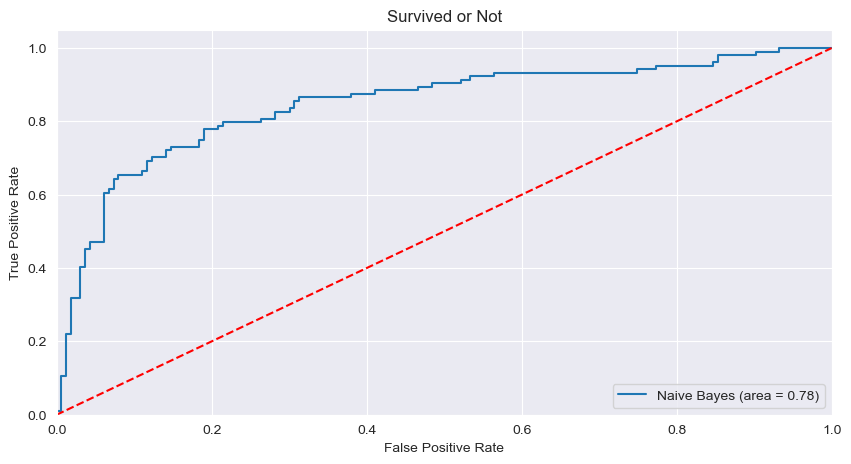

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### SVM

In [60]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [61]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [62]:
y_pred_prob

array([0.3327, 0.3305, 0.5418, 0.4787, 0.3617, 0.3308, 0.6471, 0.3394,
       0.3225, 0.3361, 0.3478, 0.4009, 0.3298, 0.3337, 0.3302, 0.3321,
       0.4264, 0.4929, 0.3331, 0.3323, 0.3319, 0.3575, 0.3447, 0.3364,
       0.4186, 0.5558, 0.3452, 0.3535, 0.3311, 0.3339, 0.332 , 0.4871,
       0.3921, 0.3313, 0.3315, 0.3583, 0.3792, 0.3125, 0.3312, 0.3339,
       0.3231, 0.331 , 0.3333, 0.3348, 0.3211, 0.3328, 0.3683, 0.3854,
       0.3446, 0.3535, 0.3626, 0.4108, 0.3329, 0.3358, 0.3282, 0.3312,
       0.394 , 0.3313, 0.5463, 0.3349, 0.3342, 0.5778, 0.6049, 0.3653,
       0.4126, 0.3216, 0.3324, 0.4037, 0.331 , 0.3414, 0.5   , 0.3312,
       0.3326, 0.5221, 0.3226, 0.3322, 0.331 , 0.3126, 0.3325, 0.3313,
       0.321 , 0.6955, 0.5344, 0.3314, 0.3419, 0.33  , 0.4094, 0.3869,
       0.3077, 0.7917, 0.3322, 0.3311, 0.3315, 0.3307, 0.3421, 0.3817,
       0.3335, 0.3564, 0.3312, 0.3524, 0.5549, 0.3398, 0.3202, 0.3441,
       0.3329, 0.3314, 0.4121, 0.3581, 0.3601, 0.3321, 0.3313, 0.7311,
      

### Evaluation of SVM

In [63]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6217228464419475


In [64]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.5789473684210527
Recall: 0.10576923076923077


In [65]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.62      0.95      0.75       163
           1       0.58      0.11      0.18       104

    accuracy                           0.62       267
   macro avg       0.60      0.53      0.47       267
weighted avg       0.61      0.62      0.53       267



In [66]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [67]:
print('Confusion Matrix for SVM:''\n',cm3 )

Confusion Matrix for SVM:
 [[155   8]
 [ 93  11]]


In [68]:
print('Accuracy Score for SVM:',score3 )

Accuracy Score for SVM: 0.6217228464419475


In [69]:
print('Auc Score for svm:',auc3 )

Auc Score for svm: 0.5283447380840018


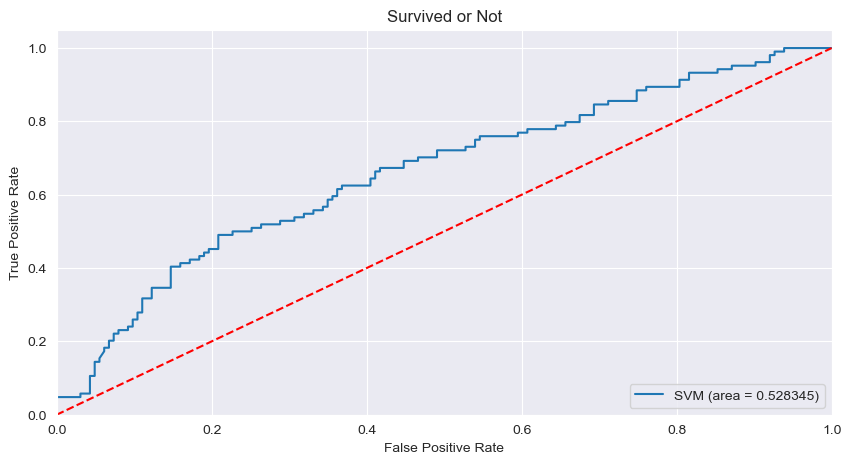

In [70]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

### Decision Tree

In [71]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [72]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [73]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred_prob

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

### Evaluation of Desicion Tree

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7490636704119851


In [75]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       163
           1       0.66      0.72      0.69       104

    accuracy                           0.75       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.75      0.75      0.75       267



### usnig criteraton entropy

In [81]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
print("Precison:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7640449438202247
AUC: 0.7441009910335065
Precison: 0.7157894736842105
Recall: 0.6538461538461539


In [82]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       163
           1       0.72      0.65      0.68       104

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267



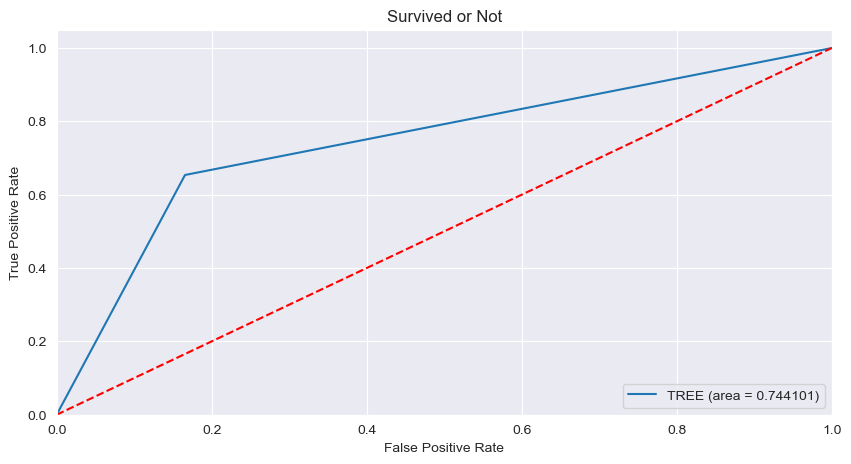

In [85]:
TREE_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='TREE (area = %02f)' % TREE_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('TREE_ROC')
plt.show()

### Random Forest

In [86]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
# Train the model on training data
rf.fit(X_train,y_train);

In [87]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [89]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred_proba

array([0. , 0. , 0.6, 1. , 0.3, 0. , 0.7, 0.1, 0. , 0.7, 1. , 1. , 0.1,
       0.5, 0. , 0.2, 1. , 1. , 0.5, 0.1, 0.1, 0. , 0.2, 0. , 0. , 0.5,
       0.3, 0.6, 0.5, 0. , 0.5, 0.4, 0. , 0.3, 0. , 0.2, 1. , 0. , 0.2,
       0. , 0.2, 0.1, 0.4, 0.9, 0.4, 0. , 0.7, 0.8, 0.8, 0. , 0.4, 1. ,
       0. , 0. , 0.1, 0.1, 0.5, 0.3, 0. , 0.9, 0.7, 0.9, 0.9, 0. , 0.7,
       0.1, 0.1, 0.6, 0.1, 0.2, 0.6, 0. , 0.8, 1. , 0.1, 0.9, 0. , 0. ,
       0.2, 0.1, 0. , 0.7, 0.8, 0.1, 0.2, 0.9, 0.1, 0.9, 0.1, 1. , 0.1,
       0.6, 0.4, 0. , 0.7, 1. , 0.7, 0.5, 0. , 0.5, 0.8, 0.9, 0. , 0.8,
       0.8, 0.1, 1. , 0.1, 0.7, 0.2, 0.1, 0.5, 0.8, 1. , 0. , 1. , 0. ,
       0.1, 0.9, 0.8, 0.3, 0.1, 0.2, 0.1, 0. , 0.7, 0.7, 0.4, 0.6, 0.6,
       0. , 0.7, 0.9, 0.6, 0.2, 0.1, 0.1, 0. , 0.5, 0.4, 0.1, 0.1, 0.4,
       0.2, 0.4, 0.4, 0.1, 0.2, 0.5, 0.8, 0.2, 0.9, 0.5, 0.9, 0.2, 0.9,
       0.1, 0. , 0.9, 0.2, 0. , 0. , 0.1, 0.5, 0.1, 0.6, 0. , 0.2, 0. ,
       0.2, 0.8, 0.3, 0.9, 0.2, 0.2, 0. , 0.1, 0.1, 1. , 0.2, 1.

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))
print("Precison:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8277153558052435
AUC: 0.8032090608777726
Precison: 0.8372093023255814
Recall: 0.6923076923076923


In [93]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



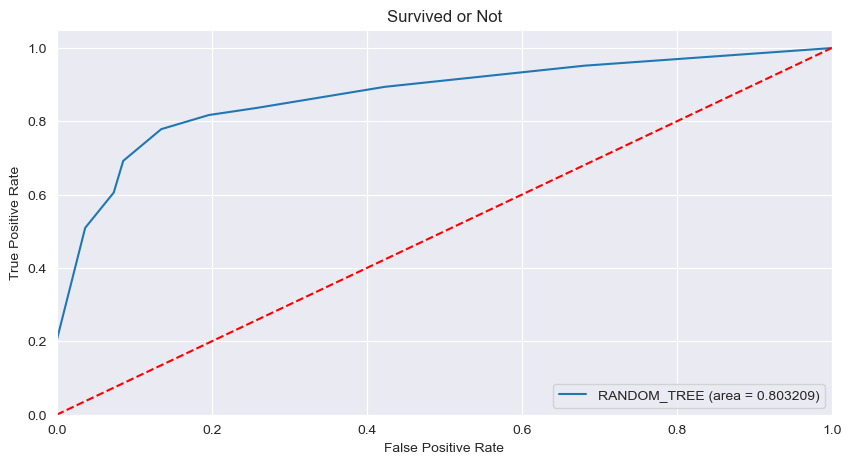

In [96]:
RANDOM_TREE_roc_auc = roc_auc_score(y_test,rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='RANDOM_TREE (area = %02f)' % RANDOM_TREE_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('RANDOM_TREE_ROC')
plt.show()

### KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [106]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.2, 0.2, 1. , 0.8, 0.2, 0.2, 0.4, 0. , 0.2, 0. , 0.2, 1. , 0.4,
       0.2, 0. , 0.4, 0.6, 0.6, 0.4, 0.6, 0.4, 0. , 0.4, 0.2, 0.6, 0.8,
       0.2, 0.2, 0.4, 0. , 0.2, 0.4, 1. , 0.2, 0.2, 0.2, 0.6, 0.2, 0.6,
       0.4, 0. , 0. , 0. , 0. , 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.8, 0.6,
       0.4, 0.2, 0.2, 0. , 0.8, 0.2, 0.4, 0.4, 0.2, 1. , 0.4, 0.2, 0.4,
       0.2, 0.6, 0.4, 0.2, 0.8, 0.6, 0.4, 0. , 0.6, 0.2, 0. , 0.2, 0.4,
       0. , 0.6, 0.4, 0.8, 0.6, 0. , 0.2, 0.4, 0. , 0.8, 0. , 0.6, 0. ,
       0.4, 0.2, 0. , 0.4, 0.6, 0.6, 0.2, 0.4, 0.6, 0.6, 0.4, 0.2, 0.4,
       0.4, 0.2, 0.8, 0.6, 0.4, 0.2, 0.2, 0.8, 0.4, 0. , 0.2, 0.8, 0. ,
       0.2, 0. , 0.8, 0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.6, 0.2, 0.4, 1. ,
       0.2, 0.4, 0.6, 0.6, 0.2, 0.2, 0.6, 0. , 0.6, 0.4, 0.2, 0.6, 0.2,
       0.2, 0.6, 0.4, 0.4, 0.4, 0.6, 0.2, 0.2, 0.4, 0. , 0.2, 0.6, 0.6,
       0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2, 0. , 0.4, 0.6,
       0.4, 0.2, 1. , 0.8, 0.4, 0.6, 0.2, 0.2, 0.6, 1. , 0.2, 0.

In [107]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_pred))
print("Precison:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6292134831460674
AUC: 0.5797251061821614
Precison: 0.5362318840579711
Recall: 0.3557692307692308


In [108]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[131  32]
 [ 67  37]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       163
           1       0.54      0.36      0.43       104

    accuracy                           0.63       267
   macro avg       0.60      0.58      0.58       267
weighted avg       0.61      0.63      0.61       267



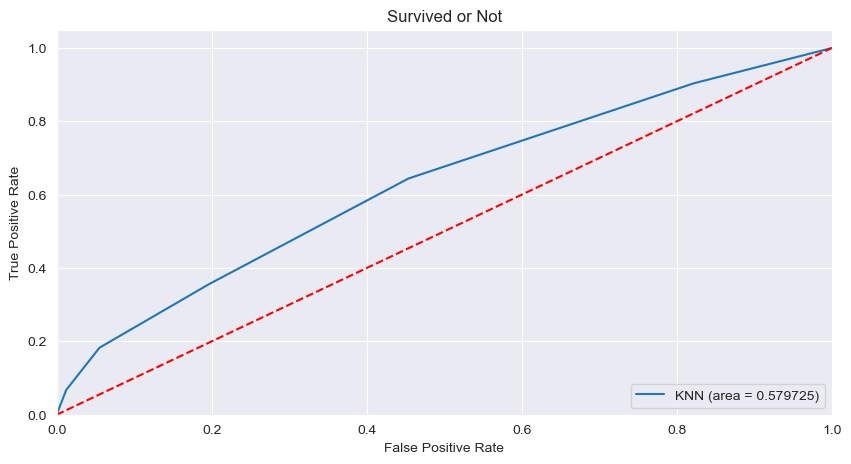

In [109]:
KNN_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %02f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

### Model selection
### K fold validation

In [110]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In [111]:
print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8087557603686635
Standard deviation of CV: 0.03121720650215298


In [112]:
# extra material for k folds -> https://scikit-learn.org/stable/modules/cross_validation.html